# Project 3: Portfolio Optimisation in Modern Portfolio Theory.

In [1]:
#import sys                                                   # Installing conda package in the current Jupyter kernel
#!conda install --yes --prefix {sys.prefix} pandas-datareader # this takes a while, I'm sorry

import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import loglog, xlabel, ylabel, title, legend, figure, plot, axes

## 1. Introduction.

This is a report exploring the algorithmic interpretations and uses of Modern Portfolio Theory; a strategy used by investors worldwide to manage Billions of pounds worth of assets. We will be discussing the merits of using computers to do this calculation using the Monte Carlo method, and decide whether using the weightings it suggests optimises returns or reduces risk. 

### 1.1 Historical Background.
Modern Portfolio Theory (MPT) was developed in 1952 to quantify the risk an investor was taking on in comparison to their possible return. This was the first mathmatical theory to include the diversification of assets into a risk/return calculation. While the idea can be used across all asset classes, this report will concentrate on the algorithm needed to diversify across just four stocks; although this easily extrapolates to other situations and asset classes.

The ability to quantify the ratio of risk to return has helped investors for centuries in the idea that it is acceptable to invest in an likely unsucsessful venture if the reward if it did sucseed is high enough. Since the invention of currency, these calculations have been made. An investment with a success probability of 20% is acceptable if the risk/return ratio is 1/5 as; the one time it profits (in five), it makes more than it lost the other four times. 

Diversification had always been known to investors to be a key consideration in asset allocation.
To take on too much risk was dangerous, but to be underexposed meant loosing on potential profits. Until Harry Markowitz's development of MPT, these decisions were made somewhat arbitrarily, with very little maths being used. By joining these two ideas [1], Markowitz not only earned the 1990 Nobel Prize for Ecinomic Sciences, but gave investors an entire new method for quantifying risk. Not only risk of exposure, but risk of diversification.


### 1.2 The Efficient Frontier.
The idea Markowitz introduced uses an idea called an "Efficiant Frontier". By plotting the return against the risk, where each plot represents a combination of asset weightings, the shape of Fig 3 is found. Here, there is a straight line of weightings which offer zero risk. In this case of Fig 4, it begins at (0, 0) and intersects the sharp left hand boundry at (0.23, 0.12) this is the line which has the optimum ratio of risk/return, so the portfolio it intersects is the desired weighting in our portfolio. The third set of methods (2.3) will describe how to create this (Fig 1, Fig 3) from a set of four stocks. 

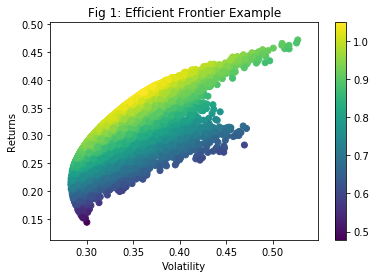

In [2]:
"""This code is repeated and described later in section 2.3, here the graph shape is the key point"""

stocks = ['AAPL', 'AMZN', 'MSFT', 'NFLX']                           

tech_data_set = web.DataReader(stocks,data_source='yahoo',start='01/01/2000')['Adj Close']
tech_data_set.sort_index(inplace=True)                           
returns = tech_data_set.pct_change()                                     
mean_daily_returns = returns.mean()                                 
cov_matrix = returns.cov()
num_port = 25000                                             
results = np.zeros((3,num_port))                             

for i in range(num_port):
    weights = np.random.random(4)                                                  
    weights /= np.sum(weights)                                                     
    port_return = np.sum(mean_daily_returns * weights) * 252                  
    port_stdev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = port_return                                                
    results[1,i] = port_stdev
    results[2,i] = results[0,i] / results[1,i]        
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])           

plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe)
plt.xlabel('Volatility')                                                           
plt.ylabel('Returns')
plt.title("Fig 1: Efficient Frontier Example")
plt.colorbar()

### 1.3 The Sharpe Ratio.
To quantify the risk/return ratio, there is an equation known as the Sharpe Ratio:

$Sharpe = \frac{R_{P}-R_{N}}{\sigma}$ 

where $R_{P} = $ Return of Portfolio, $R_{N} = $ Return of Risk Free Portfolio and $\sigma = $Standard Deviation of Portfolio. For the purposes of this example the Risk Free Portfolio does not exist, as there is no algorithmic determination of the portfolio's cash holdings. In an actual portfolio algorithm, if an investment had too much volatility and no alternative was available, cash would be preferable to taking on more risk. But, as this algorithm has no instructions like this, it fills 100% of the portfolio with our four stocks. This is discussed extensivly in Paper [2], where Oliver Ledoit discussed how it can be used to evaluate stratagies and later in the Discussion section.

## 2. Methods.
This project will explore the methods used to optimise stock porfolio returns while minimising the volatility of the portfolio. Here, volatility will be defined as the standard deviation of the stock or portfolio and the 'optimal' portfolio used will be the one with the largest return, and smallest volatility. In this, I will also find the portfolio with the minimum volatility - the lowest risk weightings - and compare the performance of these two methods with a portfolio of equal weightings.
### 2.1 Importing a Single Stock's Data.
Firstly, I will demonstrate the code neccesary to pull data from external sources using pandas - more specifically the DataReader module - from Yahoo's financial history database. Here, data for Apple is imported, plotted and analysed. As the statistics used later are the standard deviation and average return, these are displayed for this stock from the start of 1998 to today; all using the pandas module.

The annual mean return of stock AAPL is 38.0 percent, and the annual volatility is 43.0 percent.


C:\Users\Henry\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


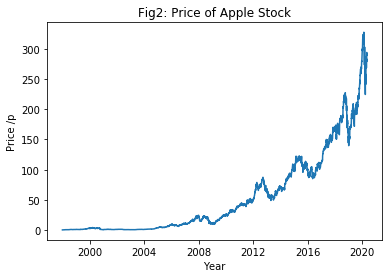

In [3]:
APPL_ticker = ['AAPL']
APPL_data = web.DataReader(APPL_ticker,data_source="yahoo",start='01/01/1998')['Adj Close']
APPL_data.sort_index(inplace=True)
"""This finds the APPL data within the yahoo finance database, since the year 1998, then finds the mean daily change and
            standard devistion from this mean."""
APPL_return = APPL_data.pct_change()
mean_APPL_return = APPL_return.mean()
APPL_stdev = APPL_return.std()

annual_APPL_return = round(mean_APPL_return * 252,2)            #252 trading days per year, rouning to two places.
annual_APPL_stdev = round(APPL_stdev * np.sqrt(252),2)

plt.plot(APPL_data)
plt.xlabel("Year")
plt.ylabel("Price /p")
plt.title("Fig2: Price of Apple Stock")
print(('The annual mean return of stock {} is {} percent, and the annual volatility is {} percent.')
      .format(APPL_ticker[0],annual_APPL_return[0]*100,annual_APPL_stdev[0]*100))

### 2.2 Importing Multiple Stock's Data.
In order to analyse many stocks, each one's data must be imported and formalised. Here, a list of Tickers is created, and using the twelve years after 1998 and the ten years since 2010 seperatly, the data is plotted to show the stocks General Electric, IBM, Coca~Cola and Microsoft, all large blue chip stocks each with a reason to invest. 

Text(0.5, 1.0, 'Fig3: Prices of the Four Stocks 1998-2010')

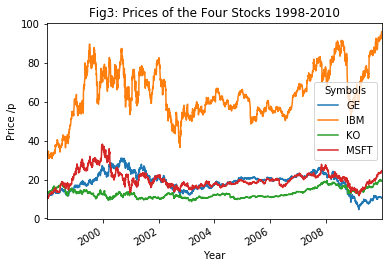

In [4]:
stocks = ['GE','IBM','KO','MSFT']                           #list of stocks in portfolio must be in Alphabetical order.

data_set = web.DataReader(stocks,data_source='yahoo',start='01/01/1998', end = '01/01/2010')['Adj Close']
data_set.sort_index(inplace=True)                           
returns = data_set.pct_change()                                     
"""The code here has imported daily close prices for each of the four stocks between 1998 and 2010 and saved in data_set,
    then found the daily change and saved it as returns. The following two lines does the same, but for the time since 2010.
    This gives a chance for us to test the validity of the method in Results section 3.2."""
late_data_set = web.DataReader(stocks,data_source='yahoo',start='01/01/2010',end='01/01/2020')['Adj Close']
late_data_set.sort_index(inplace=True)                      


data_set.plot()
plt.xlabel("Year")
plt.ylabel("Price /p")
plt.title("Fig3: Prices of the Four Stocks 1998-2010")

### 2.3 Finding the Optimal Portfolio Weighting.
In finding the optimum portfolio weighting, the calculation done in Results 3.2 for equal weighting could be repeated for many different weightings by hand. This would take a long time, as we are testing 25,000 portfolios; this is not a very efficient method. The other main way to calculate large numbers of random weightings is to use the Monte-Caro method, ensuring that the weights always sum to 100% of the portfolio. 

In [5]:
mean_daily_returns = returns.mean()                                 
cov_matrix = returns.cov()
num_port = 25000                                             

results = np.zeros((4+len(stocks)-1,num_port))                         #results array now also holds the weights for each stock.

"""Monte-Carlo method is used here, by making an array of random numbers and making sure they sum to 1.0, then multiplying
    the mean daily retuns by each weight and finding the average potfolio standard deviation for each weight gives an array
    which we then assign to results"""
for i in range(num_port):
    weights = np.array(np.random.random(4))                                               #generating random numbers as weights.
    weights /= np.sum(weights)                                                                            #sum of weights = 1.0.
    port_return = np.sum(mean_daily_returns * weights) * 252                  
    port_stdev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = port_return                                                
    results[1,i] = port_stdev  
    
    """This is the Sharpe Ratio from 1.3, the return/volatility. The risk free rate is excluded but can be added if needed. 
        Then the data is added to the results array below."""
    results[2,i] = results[0,i] / results[1,i]      #Add a value for anual risk free rate here on top of the fraction if needed.
    for j in range(len(weights)):                               
        results[j+3,i] = weights[j]

"""Creanting DataFrames of the desired portfolios, where pport = predicted portfolio, and port = portfolio, as the predicted
        is for the range 1998-2010, and the port is for 2010-2020. If an 'out of place p' is noticed, it is likely referencing 
        this notation, p=predicted."""
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]                         #locates the desired portfolios.
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]                       

## 3. Results.
### 3.1 Efficiant Frontier and Portfolio's.

It is obvious from Fig 4 that the Optimised (Red) portfolio has a much stronger Return per Risk, with a sharpe ratio much larger than the equal weighting portfolio's ratio. This is compared to a sharpe ratio between them for the minimum volatility portfolio. I cannot quote exact values due to the slight random discrepancies in the weightings due to the Monte-Carlo method.

Even (Yellow) Portfolio 
 expected annual return: 10.0% 
 volatility: 24.0% 
 sharpe ratio of 0.4079.

Optimised (Red) Portfolio 
 expected return: 12.0% 
 volitility:25.0%
 weightings: GE:0.0%, IBM:53.0%, KO:21.0%, MSFT:26.0%
 sharpe ratio of 0.4844.

Minimum (Green) Risk Portfolio
 expected return: 9.0% 
 volitility of 21.0%
 weightings: GE:10.0%, IBM:25.0%, KO:55.0%, MSFT:10.0%
 sharpe ratio of 0.4052.


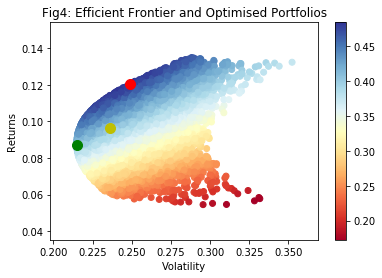

In [6]:
"""This first third of code is to find the predicted annual return for the evenly weighted portfolio. It takes the mean and 
        standard deviation, and performs a very similar analysis to 2.3."""
returns = data_set.pct_change()   
mean_daily_returns = returns.mean()                  
cov_matrix = returns.cov()   
even_weights = np.asarray([0.25,0.25,0.25,.25])       #set array holding portfolio weights of each stock
even_portfolio_return = np.sum(mean_daily_returns * even_weights) * 252    
even_portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, even_weights))) * np.sqrt(252) 

plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility') #create scatter plot coloured by Sharpe Ratio
plt.ylabel('Returns')
plt.title('Fig4: Efficient Frontier and Optimised Portfolios')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker='o',color='r', s = 100) #highest Sharpe Ratio = red star
plt.scatter(min_vol_port[1],min_vol_port[0],marker= 'o', color='g', s = 100) #minumum variance = green star
plt.scatter(even_portfolio_std_dev, even_portfolio_return, marker = 'o', color = 'y', s =100)

print(('Even (Yellow) Portfolio \n expected annual return: {}% \n volatility: {}% \n sharpe ratio of {}.\n')
      .format(round(even_portfolio_return*100), round(even_portfolio_std_dev*100), 
              round(even_portfolio_return/even_portfolio_std_dev, 4)))

"""This later section is printing the results of the optimal portfolio and the minimum volatility portfolio. These are plotted
        as well in Red and Green respectivly (with the Yellow being the Even portfolio) on the Efficient Frontier"""
print("Optimised (Red) Portfolio \n expected return: {}% \n volitility:{}%\n weightings: GE:{}%, IBM:{}%, KO:{}%, "
              "MSFT:{}%\n sharpe ratio of {}.\n"
      .format(round(max_sharpe_port[0]*100), round(max_sharpe_port[1]*100), round(max_sharpe_port[3]*100), 
              round(max_sharpe_port[4]*100), round(max_sharpe_port[5]*100), round(max_sharpe_port[6]*100), 
              round(max_sharpe_port[2], 4)))
print("Minimum (Green) Risk Portfolio\n expected return: {}% \n volitility of {}%\n weightings: GE:{}%, IBM:{}%, KO:{}%, "
          "MSFT:{}%\n sharpe ratio of {}."
      .format(round(min_vol_port[0]*100), round(min_vol_port[1]*100), round(min_vol_port[3]*100), 
              round(min_vol_port[4]*100), round(min_vol_port[5]*100), round(min_vol_port[6]*100), round(min_vol_port[2],4)))

### 3.2 Is the Optimised Portfolio Better?

An average error in predicted return of $\approx 1.039\%$ is strong for a ten Year forecast and a volatility prediction error of $\approx 1.76\%$ is equally strong. One thing to note here though is that the timescale is almost as long as the test data, this means that with even more data, it is likely that this will become more accurate. I implore the reader to play with this themselves, import the data_set as 1998-2015 then lata_data_set as 2015-2020 and see if this is more acurate. There is not enough time for me to do this, but I hypothesise that it will become more acurate the larger the ratio of test : results time is. 

Here there has been a small amount of value added by using the Optimised Weightings, a return gain of 0.1693% which is negligable compared to an error of 1.039%. This is due to the portfolio's underweight holding in MSFT, which performed badly 1998-2010, being hit by both the Dot.Com crash ad the 2008 recession. It then did very well from 2010 till 2020 as seen in red on Fig 5. 


Even Portfolio: 
 annual return after 2010: 10.47% 
 volatility after 2010: 23.49%.

Optimised Portfolio: 
 annual return after 2010: 10.69% 
 volatility after 2010: 22.98%.

Minimum Volatility Portfolio: 
 annual return after 2010: 10.14% 
 volatility after 2010: 21.47%.

Returns Table - in Percentages
          Portfolio             Predicted Return (1998-2010)    Actual Return (2010-2020)                 Error             
             Even                          9.6294                        10.4736                          -0.84             
          Optimised                       12.0418                        10.6867                           1.36             
         Minimum Risk                      8.7044                        10.1355                          -1.431            

Volatility Table - in Percentages
          Portfolio            Predicted Volatility (1998-2010) Actual Volatility (2010-2020)             Error          
             Even                    

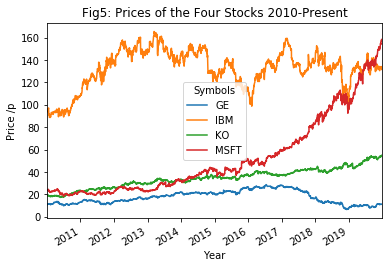

In [7]:
"""What follows is similar to the analysis done in the first half of Method 2.3, except the weightings are set to 25% per stock.
    This gives a comparable dat set to the optimised and minimum risk portfolios, to see if they add value."""

late_returns = late_data_set.pct_change()                             
late_mean_daily_returns = late_returns.mean()                                 #mean daily return and covariance of dailyreturns.
cov_matrix = returns.cov()     

even_weights = np.asarray([0.25,0.25,0.25,.25])                                           #arrays holding weights of each stock.
optimised_weights = np.asarray([max_sharpe_port[3], max_sharpe_port[4], max_sharpe_port[5], max_sharpe_port[6]])
min_vol_weights = np.asarray([min_vol_port[3], min_vol_port[4], min_vol_port[5], min_vol_port[6]])


"""The next step is to calculate the returns for each portfolio, using weights calculated above for the even portfolio and in
    3.1 for the other two. Using these weightings, we calculate the return of each portfolio after 2010."""
late_even_portfolio_return = np.sum(late_mean_daily_returns * even_weights) * 252   
late_even_portfolio_std_dev = np.sqrt(np.dot(even_weights.T,np.dot(cov_matrix, even_weights))) * np.sqrt(252)  

late_op_portfolio_return = np.sum(late_mean_daily_returns * optimised_weights) * 252  
late_op_portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, optimised_weights))) * np.sqrt(252) 

late_min_vol_return = np.sum(late_mean_daily_returns * min_vol_weights) * 252
late_min_vol_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, min_vol_weights))) * np.sqrt(252)
print()


print(('Even Portfolio: \n annual return after 2010: {}% \n volatility after 2010: {}%.\n')
      .format(round(late_even_portfolio_return*100, 2),round(late_even_portfolio_std_dev*100, 2)))
print(('Optimised Portfolio: \n annual return after 2010: {}% \n volatility after 2010: {}%.\n')
      .format(round(late_op_portfolio_return*100, 2), round(late_op_portfolio_std_dev*100, 2)))
print(('Minimum Volatility Portfolio: \n annual return after 2010: {}% \n volatility after 2010: {}%.\n')
      .format(round(late_min_vol_return*100, 2), round(late_min_vol_std_dev*100, 2)))

late_data_set.plot()
plt.xlabel("Year")
plt.ylabel("Price /p")
plt.title("Fig5: Prices of the Four Stocks 2010-Present")

print("Returns Table - in Percentages")
print("{:^30} {:^30} {:^30}  {:^30}".format("Portfolio", "Predicted Return (1998-2010)" , "Actual Return (2010-2020)", "Error"))
print("{:^30} {:^30} {:^30}  {:^30}".format('Even', round(even_portfolio_return*100,4), round(late_even_portfolio_return*100,4)
                                            , round((even_portfolio_return-late_even_portfolio_return)*100, 2)))
print("{:^30} {:^30} {:^30}  {:^30}".format('Optimised', round(max_sharpe_port[0]*100,4), round(late_op_portfolio_return*100,4)
                                            , round((max_sharpe_port[0]-late_op_portfolio_return)*100, 2)))
print("{:^30} {:^30} {:^30}  {:^30}".format('Minimum Risk', round(min_vol_port[0]*100,4), round(late_min_vol_return*100,4)
                                            , round((min_vol_port[0]-late_min_vol_return)*100, 3)))
print()

print("Volatility Table - in Percentages")
print("{:^30} {:^30} {:^30}  {:^25}".format("Portfolio", "Predicted Volatility (1998-2010)","Actual Volatility (2010-2020)"
                                            , "Error"))
print("{:^30} {:^30} {:^30}  {:^30}".format('Even', round(even_portfolio_std_dev*100,4), round(late_even_portfolio_std_dev*100,4)
                                            , round((even_portfolio_std_dev-late_even_portfolio_std_dev)*100, 2))) 
print("{:^30} {:^30} {:^30}  {:^30}".format('Optimised', round(max_sharpe_port[1]*100,4), round(late_op_portfolio_std_dev*100,4)
                                            , round((max_sharpe_port[1]-late_op_portfolio_std_dev)*100, 2)))
print("{:^30} {:^30} {:^30}  {:^30}".format('Minimum Risk', round(min_vol_port[1]*100,4), round(late_min_vol_std_dev*100,4)
                                            , round((min_vol_port[1]-late_min_vol_std_dev)*100, 2)))

## 4. Discussion.

There are a few issues with this method. Firstly, as the Monte Carlo method is statistical, there may never be a truely optimal portfolio returned, just a good approximation. This is also why, in writing this I aim to avoid calculated values in the markdown cells, as each time this is ran, the values change by $\approx \pm 0.5\%$, this is due to the scaling by 100 to a percentage in the last step of 3.2; small random discrepancies are compounded. In the real world, this is solved by the fact that investors do not need the best optimisation; they simply need a better portfolio allocation than the overall market. Professional investors can also use better computers than this Lenovo and so will be able to run many more than 25,000 weightings before their computer breaks. This method provides this approximation to an accuracy good enough to use for the majority of users. 

Also, this portfolio does not allow for cash or short positions, the cash would be allowed by adding a no-risk-rate (often an interest rate that cash accumulates) into the sharpe ratio, and a set of data points of unchanging cash value; i.e the deviation would be close to zero and the annual return would be the interest rate. The short portfolio would be much more complicated, as it would now stop the sum of weights being 1.0. They could now sum too less than one. I am unsure as to how this would be achieved, but it is discussed in Forum [3]. Short selling is when the investor profits as an asset looses value, and looses money as it increases in price. This is very risky, and is done by initially borrowing stocks, so most retail investors are not reccomended to do it, but many professionals incorporate it into their strategies. This would be a very useful addition for the reader to add. 

Lastly, there is some debate in the financial industry about the value of Sharpe ratios. It depends on their views on previous price data. On one hand, some say that previous prices should not be a consideration when buying/selling, and more in depth analysis is neccessary - these people belive in the fundementals of an asset. On the other hand, technical analysts suggest that previous price can dictate where future highs and lows will develop. And so, many technical analysts belive in the Sharpe Ratio, and use it while many fundimental analysts prefer to look deeper into a buying/selling opportunity. Depending on which school of thought the reader follows, this portfolio optimisation method could be a cornerstone of a strategy, or just another factor to consider in the bigger picture. 

There are also many alteratives to the Sharpe ratio. They have been developed as the sharpe ratio does not differentiate between upside volatility and downside volatility. This is a vital distinction, as seen in Fig 1 of Apple stock. Here the volatility is 43%, actually higher than the average annual return of 38%. It is obvious by looking at the graph that owning the stock over this time would be extremly profitable, and yet, the sharpe ratio for APPL is fairly high at $0.883$. The Sharpe ratio assumes a Normal Distribution in returns with an either positive or negative average. Returns however, are almost always skewed positive or negative. One alternative to the Sharpe ratio is the Sortino Ratio:

$Sortino = \frac{R_{P}-R_{N}}{\sigma_{N}}$

Where all notation is as before, but $\sigma_{N}$ is the Standard Deviation of the Negative returns; in this ratio, only the negative returns contribute to the 'Volatility' and, as holding a positivly skewed asset is a good thing we discard the positive deviations from the mean. I have not incorporated this into the code as it is a simple case of changing one line in Methods 3.2, and adding a sorting line when downloading the data, but further critism of the SHarpe ratio can be found in this Investopedia article [4] on the Sharpe Ratio.

## 5. Conclusions.

To conclude this report, it must be noted that the predicted return of thr Optimised portfolio of 12% was not particularly accurate, with a difference of 1.36%. While this is not a particularly pleasing value (a percentage Error of 11.33%), the aim of this report was not to make the closest prediction. This report's goal was to access the validity of this proces, in comparison to an equal weighting portfolio. Here, the method succeded, although not to the degree I had hoped. The optimised portfolio only exceedded the return of the equal weight portfolio by 0.2131%, not a huge increase in value and the volatility decrease was similarly dissapointing at 0.5165%. This may be resolved slightly by the randomness of the weightings, as slightly different values are returned each time. This is a large drawback of the Monte-Carlo method in this application. Here, the error in the even portfolio between the expected and actual was 0.84% and the minimum risk portfolio was mispredicted by 1.431%. This report shows no added benifit to using the Monte-Carlo method to generate randomly weighted portfolios, from which we can pick the one with optimal Sharpe Ratio.

There are a number of areas to improve or further investigate, the first being the Sharpe Ratio itself; the Sortino ratio may have yeilded stronger results, as the upside volatility (which is considered a good thing) is discarded. This would have led us to favour those stocks with positivly skewed volatility, rather than treating positive and negative equally. 

Secondly, there is a large chance that the data and four stocks chosen were not optimal. For example adding two technology stocks (IBM and Microsoft) in one portfolio is dangerously undiversified; in an even portfolio, these would acount for 50% of the weighting, while technology contributes a much smaller percentage of global GDP. Deciding on just four stocks was a computational decision I made to make the calculations as fast as posible, while illustrating the concepts. In this, I was wrong to decide only four (an 'experimental error' if you will) as it does not allow proper diversification across enough industries.

From the calculated values, neither the Optimised portfolio or the Minimum risk portfolio has substantially higher returns than the even weighted portfolio, but they both did have lower volatility. In fact, the minimum risk portfolio had 2.0211% less volatility, and a prediction error of 0.01%, the best result to come from this report. The portfolio designed to have the lowest risk had the lowest (by around 8.6%) volatility of 21.47%. 

## 6. Bibliography.
1. Portfolio Selection, H.Markowitz, The Journal of Finance, Vol.7, No.1. (1952), pp. 77-91.
2. Robust performance hypothesis testing with the Sharpe ratio, O.Ledoita et.al, Journal of Empirical Finance, Vol.15, No.5, (2008), pp. 850-859.
3. www.quantconnect.com/forum/discussion/2795/fundamental-long-short-stratagy-with-mean-variance-portfolio-optimisation/p1 01/05/2020.
4. https://www.investopedia.com/articles/07/sharperatio.asp 01/05/2020
5.

In [8]:
def word_count(notebook):
    """Prints the word count in Markdown cells of the file named notebook."""
    with open(notebook, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    word_count = 0
    total_word_count = 0
    for cell in nb['cells']:
        if cell['cell_type'] == "markdown":
            lines = cell['source'].split('\n')
            for line in lines:
                if len(line) > 0 and line[0] == '#':
                    print(word_count)
                    total_word_count += word_count
                    word_count = 0
                    print(line.strip(), end=" ==> ")
                else:
                    word_count += len(line.lstrip().split(' '))
    print(word_count)
    print("Total ==> ", total_word_count)
word_count(Project3)

NameError: name 'Project3' is not defined